In [46]:
import numpy as np

In [47]:
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rcParams["figure.figsize"] = [12,12]
#If you have problems with latex at matplotlib just comment next two lines, this might help
#plt.rc('text', usetex=True)
#plt.rc('font', family='serif')
def fix_scaling(ax=None):
    if not ax:
        xlim = plt.xlim()
        ylim = plt.ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            plt.ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            plt.xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))
    else:
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()
        d1 = xlim[1] - xlim[0]
        d2 = ylim[1] - ylim[0]
        if d1 > d2:
            ax.set_ylim((ylim[0] - (d1-d2) / 2, ylim[1] + (d1-d2) / 2))
        else:
            ax.set_xlim((xlim[0] + (d1-d2) / 2, xlim[1] - (d1-d2) / 2))

In [48]:
a = 15
b = 1

def func(xArr):
    x = xArr[0]
    y = xArr[1]
    return a * (x ** 2) + b * ( x - y ) ** 2 - x - 2 * y

def f_grad(xArr):
    x = xArr[0]
    y = xArr[1]
    return np.array([2 * a * x + 2 * b * x - 2 * b * y - 1,
                        - 2 * b * x + 2 * b * y - 2])
def f_grad2():
    return np.array([[2 * a + 2 * b, - 2 * b], [-2 * b,  2 * b]])

def eigenvalues():
    return np.linalg.eigvals(f_grad2())

print(eigenvalues())

[32.13274595  1.86725405]


In [49]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
def animate_trajectory(traj, names):
    fig, ax = plt.subplots()
    n = len(traj[0])
    def step(t):
        ax.cla()
        ax.plot([0.1], [1.1], 'o', color='green')
        #Level contours
        delta = 0.025
        x = np.arange(-3, 3, delta)
        y = np.arange(-3, 3, delta)
        X, Y = np.meshgrid(x, y)
        Z = np.zeros_like(X)
        #print(X.shape, Y.shape)
        for i in range(X.shape[0]):
            for j in range(X.shape[1]):
                Z[i][j] = func([X[i][j], Y[i][j]])
        CS = ax.contour(X, Y, Z, [0.5, 1.5, 3], colors=['blue', 'purple', 'red'])
        
        for i in range(len(traj)):
            ax.plot([u[0] for u in traj[i][:t]], [u[1] for u in traj[i][:t]], label=names[i])
            ax.plot([u[0] for u in traj[i][:t]], [u[1] for u in traj[i][:t]], 'o')
            
        plt.legend()
        fix_scaling(ax)
        ax.axis('off')

    return FuncAnimation(fig, step,
                     frames=range(n), interval=600)

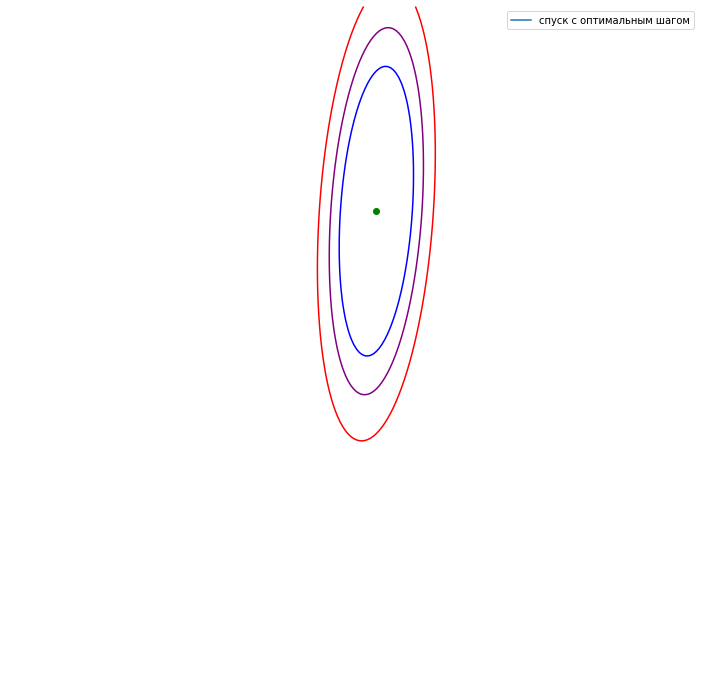

In [50]:
alpha = 2.0 / (sum(eigenvalues()))
traj_opt_step = []
x_start = np.array([2, 2.8])
traj_opt_step.append(x_start.copy())
cur_x = x_start.copy()
for i in range(30):
    cur_x = cur_x - alpha * f_grad(cur_x)
    traj_opt_step.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory([traj_opt_step], ['спуск с оптимальным шагом'])
HTML(base_animation.to_html5_video())  

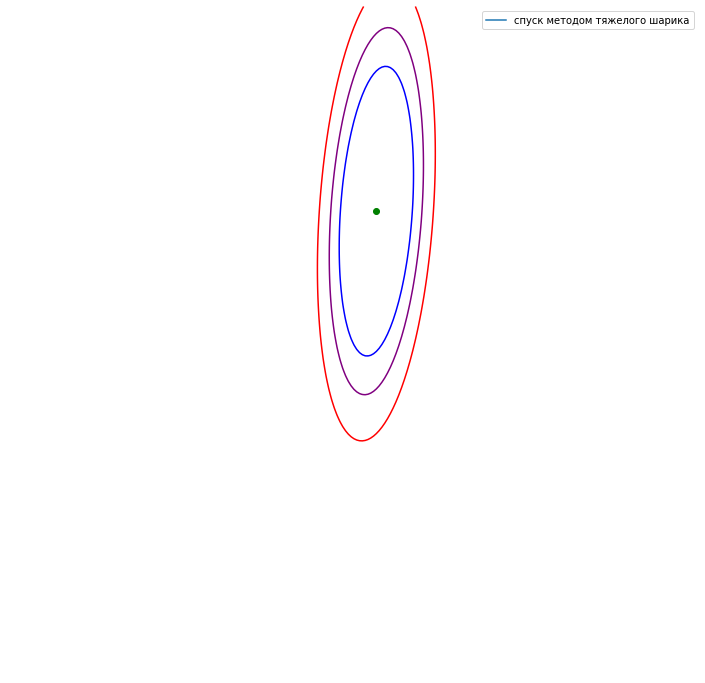

In [51]:
#Heavy ball
lambdas = eigenvalues()
alpha = 4.0 / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1])) ** 2
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_heavy_ball = []
x_start = np.array([2, 2.8])
traj_heavy_ball.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(30):
    t = cur_x
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    traj_heavy_ball.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory([traj_heavy_ball],['спуск методом тяжелого шарика'] )
HTML(base_animation.to_html5_video()) 

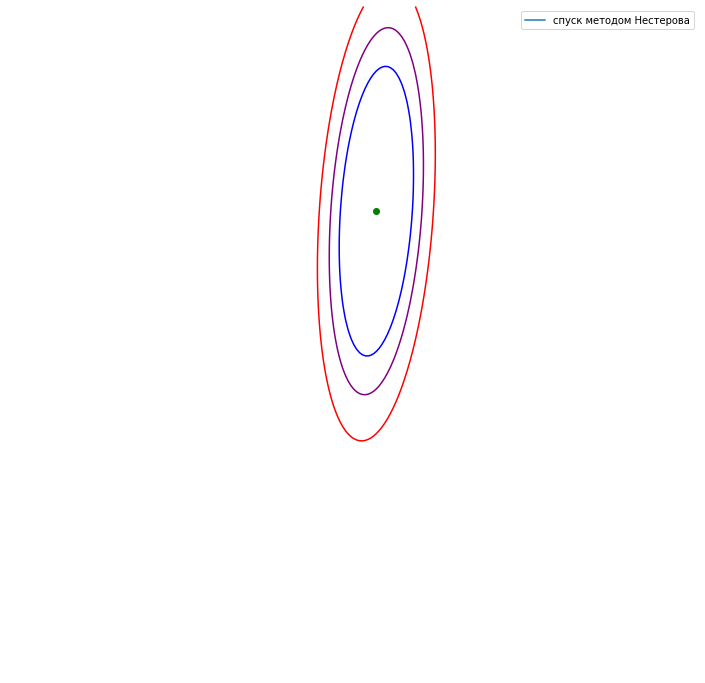

In [52]:
#Nesterov
alpha = 1 / (lambdas[0] + 1)
beta = (np.sqrt(lambdas[0]) - np.sqrt(lambdas[1])) / (np.sqrt(lambdas[0]) + np.sqrt(lambdas[1]))
traj_nesterov = []
x_start = np.array([2, 2.8])
traj_nesterov.append(x_start.copy())
cur_x = x_start.copy()
cur_y = x_start.copy()

for i in range(30):
    t = cur_x
    cur_x = cur_y - alpha * f_grad(cur_y)
    cur_y = cur_x + beta * (cur_x - t)
    traj_nesterov.append(cur_x.copy())
    
base_animation = animate_trajectory([traj_nesterov], ['спуск методом Нестерова'])
HTML(base_animation.to_html5_video()) 

0.6115237338883216
phi 1.1233916207736525
gamma 0.7371251609087865
gamma 0.6624016476479524
gamma 0.6311610813016834
gamma 0.6189566005011783
gamma 0.6143160302115142
gamma 0.6125697306849642
gamma 0.6119151465540881
gamma 0.6116701421126878
gamma 0.6115784897972966
gamma 0.6115442111636433
gamma 0.6115313916922462
gamma 0.6115265976238677
gamma 0.6115248048163993
gamma 0.6115241343742155
gamma 0.6115238836545747
gamma 0.611523789895106
gamma 0.611523754832691
gamma 0.6115237417207049
gamma 0.6115237368173297
gamma 0.6115237349836573
gamma 0.6115237342979347
gamma 0.6115237340415011
gamma 0.6115237339456048
gamma 0.6115237339097433
gamma 0.6115237338963325
gamma 0.6115237338913174
gamma 0.611523733889442
gamma 0.6115237338887407
gamma 0.6115237338884784
gamma 0.6115237338883803


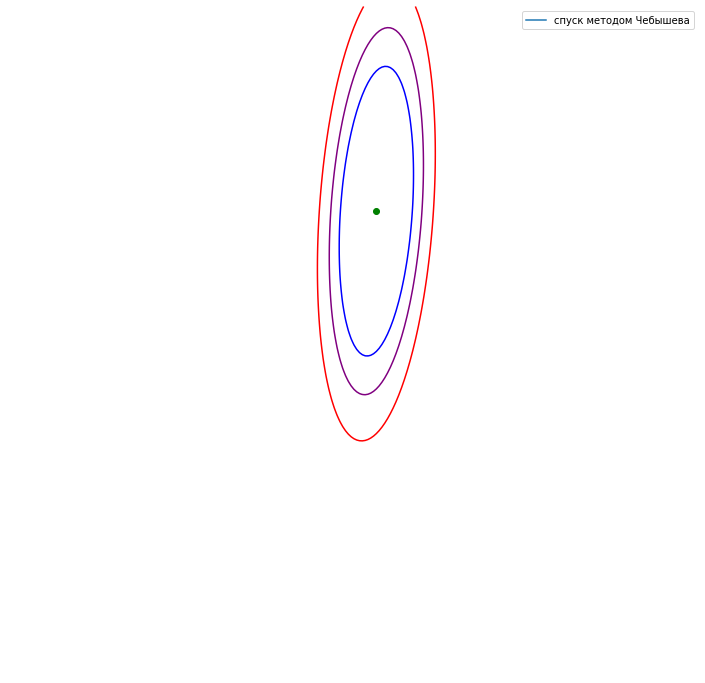

In [53]:
#Chebyshev
phi = (lambdas[0] + lambdas[1]) / (lambdas[0] - lambdas[1])
cur_gamma   = 1.0 / phi
prev_gamma  = 0
print(phi - np.sqrt(phi ** 2 - 1))
print('phi', phi)
traj_chebyshev = []
x_start = np.array([2, 2.8])
traj_chebyshev.append(x_start.copy())
cur_x = x_start.copy()
prev_x = x_start.copy()
for i in range(30):
    t = cur_x
    alpha = 4 * cur_gamma / (lambdas[0] - lambdas[1])
    beta = cur_gamma * prev_gamma
    cur_x = cur_x - alpha * f_grad(cur_x) + beta * (cur_x - prev_x)
    prev_x = t
    t = cur_gamma
    cur_gamma = 1.0 / (2 * phi - cur_gamma)
    prev_gamma = t
    print('gamma', cur_gamma)
    traj_chebyshev.append(cur_x.copy())
    
#print(traj)
base_animation = animate_trajectory([traj_chebyshev], ['спуск методом Чебышева'])
HTML(base_animation.to_html5_video()) 

[]

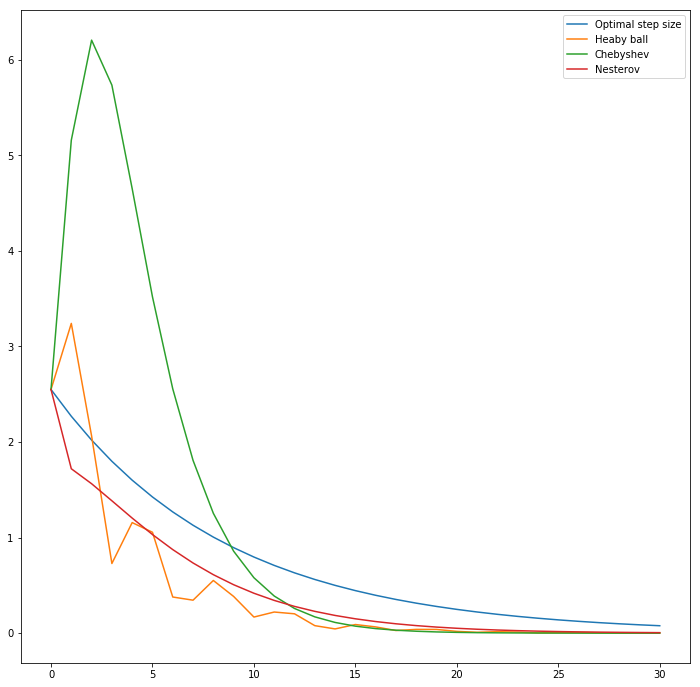

In [54]:
fig, ax = plt.subplots()
u = np.array(traj_opt_step)
ax.plot(range(31), [np.linalg.norm(t - [0.1, 1.1]) for t in u], label='Optimal step size')
u = np.array(traj_heavy_ball)
ax.plot(range(31), [np.linalg.norm(t - [0.1, 1.1]) for t in u], label='Heaby ball')
u = np.array(traj_chebyshev)
ax.plot(range(31), [np.linalg.norm(t - [0.1, 1.1]) for t in u], label='Chebyshev')
u = np.array(traj_nesterov)
ax.plot(range(31), [np.linalg.norm(t - [0.1, 1.1]) for t in u], label='Nesterov')
plt.legend()
plt.plot()

[]

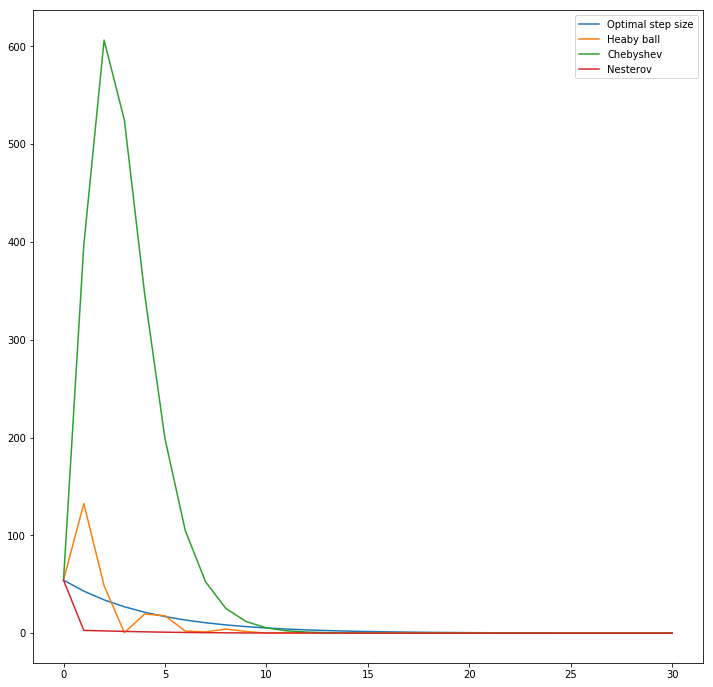

In [55]:
fig, ax = plt.subplots()
m = func([0.1, 1.1])
u = np.array(traj_opt_step)
ax.plot(range(31), [np.linalg.norm(func(t) - m) for t in u], label='Optimal step size')
u = np.array(traj_heavy_ball)
ax.plot(range(31), [np.linalg.norm(func(t) - m) for t in u], label='Heaby ball')
u = np.array(traj_chebyshev)
ax.plot(range(31), [np.linalg.norm(func(t) - m) for t in u], label='Chebyshev')
u = np.array(traj_nesterov)
ax.plot(range(31), [np.linalg.norm(func(t) - m) for t in u], label='Nesterov')
plt.legend()
plt.plot()

In [56]:
left = [[2 * a + 2 * b, - 2 * b], [-2 * b,  2 * b]]
right = [1, 2]
solve = np.linalg.solve(left, right)
print(solve)

[0.1 1.1]


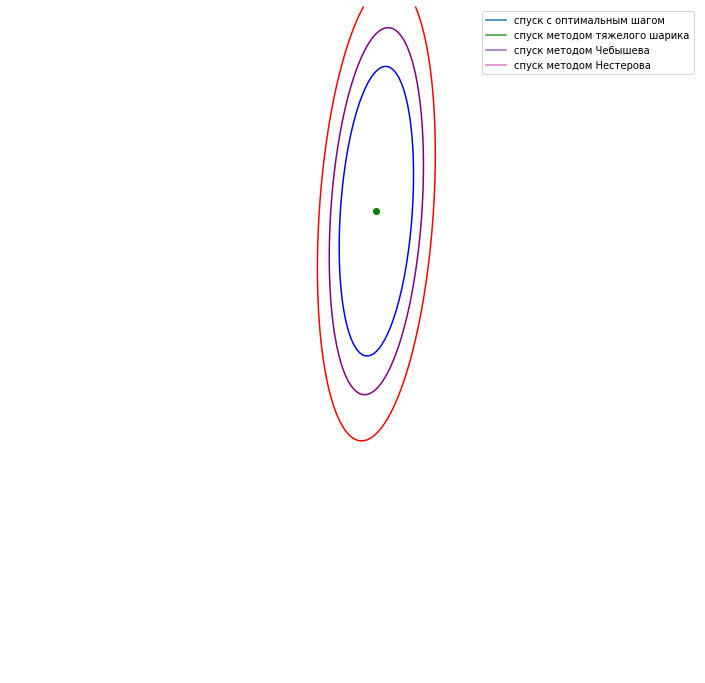

In [57]:
base_animation = animate_trajectory([traj_opt_step, traj_heavy_ball, traj_chebyshev, traj_nesterov],
                                    ['спуск с оптимальным шагом', 'спуск методом тяжелого шарика', 'спуск методом Чебышева', 'спуск методом Нестерова'])
HTML(base_animation.to_html5_video()) 